In [ ]:
!pip install ipython==7.34.0 ipykernel==5.5.6
!pip install import_ipynb

In [ ]:
try:
    import google.colab  # noqa: F401
except ImportError:
    import dolfin
else:
    try:
        import dolfin
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        import dolfin

import numpy as np
import fenics as fe

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
import import_ipynb

path = '/content/drive/MyDrive/Colab Notebooks/Physics-Informed Neural Networks/Demo/fenics_cfd/generate_data'
os.chdir(path)

Mounted at /content/drive


In [ ]:
from generate_flow_fields import generate_random_mesh, generate_flow_field
from coarse_noisy_data import generate_hr_and_lr_data
from visualize_geometry import visualize, plot_numpy_matrices

In [5]:
target_resolution = 32
length, height = 6, 1.5   # in milimeters

num_steps = 1001          # number of time steps
mu_scalar = 0.0035        # dynamic viscosity (kg/meters/seconds)
rho_scalar = 1060         # density (kg/m3)

In [7]:
mesh = generate_random_mesh(length, height, target_resolution)
u, p, diverged = generate_flow_field(mesh, mu_scalar, rho_scalar, num_steps)

Generating healthy type vessel

Converged at step 115
Executed in 18.09 s



In [8]:
high_resolution = 280
low_resolution = 140  # 40
noise_level = 0.065   # 0.05

u_hr, p_hr, u_lr, p_lr = generate_hr_and_lr_data(mesh, u, p, high_resolution, low_resolution, noise_level)

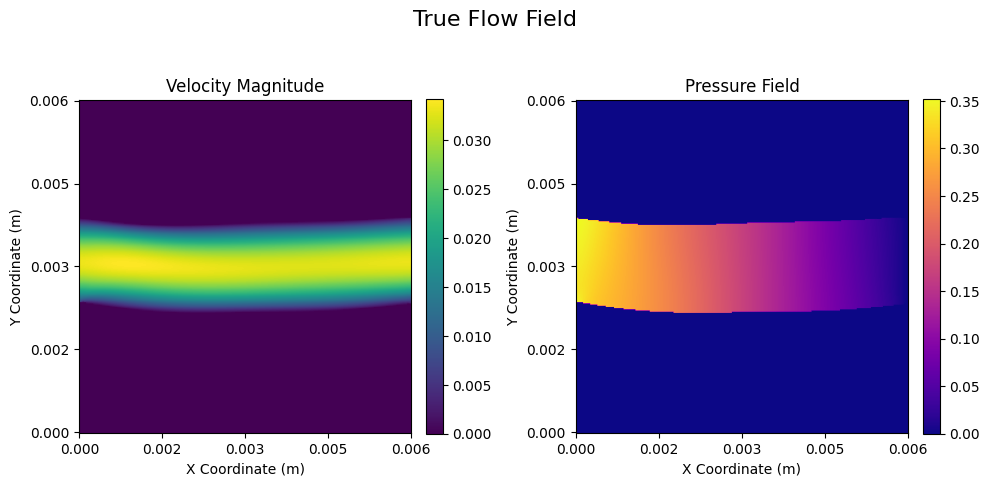

In [12]:
plot_numpy_matrices(u_hr, p_hr, main_title="True Flow Field", plot_size=5)

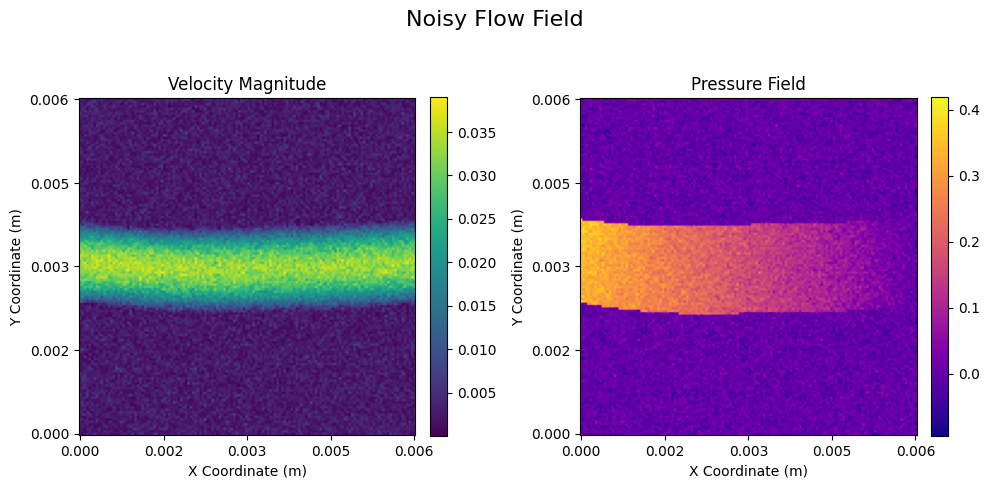

In [13]:
plot_numpy_matrices(u_lr, p_lr, main_title="Noisy Flow Field", plot_size=5)

In [15]:
target_resolution = 32
high_resolution = 280
low_resolution = 40
noise_level = 0.05

length, height = 6, 1.5   # in milimeters

num_steps = 1001          # number of time steps
mu_scalar = 0.0035        # dynamic viscosity (kg/meters/seconds)
rho_scalar = 1060         # density (kg/m3)

N = 2500

save_path_p = '/content/drive/MyDrive/Colab Notebooks/Physics-Informed Neural Networks/Demo/fenics_cfd/blood_flow_simulations/pressure_fields'
save_path_u = '/content/drive/MyDrive/Colab Notebooks/Physics-Informed Neural Networks/Demo/fenics_cfd/blood_flow_simulations/velocity_fields'

os.makedirs(save_path_p, exist_ok=True)
os.makedirs(save_path_u, exist_ok=True)

saved_simulations_count = 0

k = 0  # index for file names
for i in range(N):

  mesh = generate_random_mesh(length, height, target_resolution)
  u, p, diverged = generate_flow_field(mesh, mu_scalar, rho_scalar, num_steps)

  if not diverged:

    # Save raw data as .pvd files
    velocity_file = fe.File(os.path.join(save_path_u, f'pvd_data/velocity_{k+i}.pvd'))
    pressure_file = fe.File(os.path.join(save_path_p, f'pvd_data/pressure_{k+i}.pvd'))

    velocity_file << u
    pressure_file << p

    u_hr, p_hr, u_lr, p_lr = generate_hr_and_lr_data(mesh, u, p, high_resolution, low_resolution, noise_level)

    # Save true data as .npy files
    np.save(os.path.join(save_path_u, f'npy_data/true_data/velocity_{k+i}.npy'), u_hr)
    np.save(os.path.join(save_path_p, f'npy_data/true_data/pressure_{k+i}.npy'), p_hr)

    # Save noisy data as .npy files
    np.save(os.path.join(save_path_u, f'npy_data/noisy_data/velocity_{k+i}.npy'), u_lr)
    np.save(os.path.join(save_path_p, f'npy_data/noisy_data/pressure_{k+i}.npy'), p_lr)

    saved_simulations_count += 1

    print(f'Simulation {i+1}/{N} saved\n')
    print('- - - - - - - - - - - - - - - - - - - -\n')

  else:
    print(f'Simulation {i+1}/{N} diverged and was skipped\n')
    print('- - - - - - - - - - - - - - - - - - - -\n')

print(f"Total simulations saved: {saved_simulations_count}/{N}")

Generating healthy type vessel

Converged at step 577
Executed in 77.22 s

Simulation 1/3 saved

- - - - - - - - - - - - - - - - - - - -

Generating aneurysm type vessel

Converged at step 465
Executed in 82.22 s

Simulation 2/3 saved

- - - - - - - - - - - - - - - - - - - -

Generating aneurysm type vessel

Converged at step 207
Executed in 34.75 s

Simulation 3/3 saved

- - - - - - - - - - - - - - - - - - - -

Total simulations saved: 3/3
